In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy as sc
from scipy.sparse import diags, lil_matrix

In [18]:
def unitcell(n,w,d,t,e):

    base = (w + 1j*d -e)*np.ones(n, dtype=np.complex64)
    hoppings = t * np.ones(n-1,dtype=np.complex64)

    unit = diags([base,hoppings,hoppings],[0,-1,1],format='lil')

    return unit.tocsr()

In [53]:
def hopping_znr(n,t):
    dim1 = np.arange(0,n-1,4)
    dim2 = np.arange(3,n,4)
    base = lil_matrix((n, n), dtype=np.complex128)

    base[dim1,dim1+1] = t
    base[dim2,dim2-1] = t

    return base.tocsr()

In [173]:
import numpy as np
import scipy.sparse as sp

from scipy.sparse.linalg import inv, spsolve
from functools import lru_cache


def leads(n, w, d, t, e,return_count=False):
    unit = inv(unitcell(n, w, d, t, e).tocsc())  # already CSC
    hopp = hopping_znr(n, t).tocsc()

    g = unit.copy().tocsc()
    G = unit.copy().tocsc()
    iden = sp.identity(n, dtype=complex, format="csc")
    g_hopp = g @ hopp

    diff = np.inf
    count = 0
    while diff > 1e-6:
        A = (iden - g_hopp @ G @ hopp.T).tocsc()
        G_new = sp.csc_matrix(spsolve(A, g))  # b is CSC
        diff = np.max(np.abs((G_new - G).data)) if G_new.nnz else 0.0
        G = G_new
        count +=1

    #print(count)

    return (G, count) if return_count else G

In [170]:
dos_leads = []

In [174]:
from tqdm import tqdm
from joblib import Parallel, delayed
import os
import matplotlib.pyplot as plt

In [166]:
with tqdm(np.arange(0, 3, 0.01), desc="w sweep") as pbar:
    for w in pbar:
        G, count = leads(10, w, 0.001, 1, 0, return_count=True)  # return_count option explained below
        dos_leads.append(G)
        pbar.set_postfix(iterations=count)



w sweep: 100%|██████████| 300/300 [13:29<00:00,  2.70s/it, iterations=11]  


In [176]:
for l in range(5,30,2):
    dir_path = os.path.expanduser(f'~/Desktop/backup/zgnr/size_{l}')
    os.makedirs(dir_path, exist_ok=True)

#    dos_lead = []
    with tqdm(np.arange(0, 3, 0.01), desc="w sweep") as pbar:
        for w in pbar:
            G, count = leads(l, w, 0.001, 1, 0, return_count=True)  # return_count option explained below
#            dos_lead.append(G.toarray())
            pbar.set_postfix(iterations=count)


            fn = os.path.join(dir_path, f'leads_{l}_w_{w:.2f}.csv')

    
            np.savetxt(fn, G.toarray(), delimiter=',')

    

w sweep: 100%|██████████| 300/300 [32:45<00:00,  6.55s/it, iterations=36]  


In [169]:
from joblib import Parallel, delayed
import os
import numpy as np

def compute_and_save(w, l, dir_path):
    G = leads(l, w, 0.0001, 1, 0)  # leads MUST be defined at top-level
    fn = os.path.join(dir_path, f'leads_{l}_w_{w:.2f}.csv')
    np.savetxt(fn, G, delimiter=',')
    return w

for l in np.arange(5, 51, 5):
    dir_path = os.path.expanduser(f'~/Desktop/backup/leads/size_{l}')
    os.makedirs(dir_path, exist_ok=True)

    ws = np.arange(0, 2.5, 0.01)
    
    # Use top-level compute_and_save with args
    Parallel(n_jobs=-1)(
        delayed(compute_and_save)(w, l, dir_path) 
        for w in ws
    )


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [155]:
[(dos_leads[w].toarray()[0,0]) for w in range(len(dos_leads))]

[np.complex128(-3.898312480905637j),
 np.complex128(0.8487360105835339-1.2817486633025836j),
 np.complex128(0.6504441622461996-0.9616470796699282j),
 np.complex128(0.5470638461318635-0.8174069780677311j),
 np.complex128(0.47948375354285694-0.7306888016858658j),
 np.complex128(0.43006362422140987-0.6713422794205585j),
 np.complex128(0.3914215496336295-0.6275910717780476j),
 np.complex128(0.35983571453616825-0.5937380826240649j),
 np.complex128(0.3331889794808179-0.5666414583129279j),
 np.complex128(0.3101729309988423-0.5444001337417331j),
 np.complex128(0.28992617289983413-0.5257893350503083j),
 np.complex128(0.2718543731280648-0.509977673354521j),
 np.complex128(0.2555302963321522-0.4963764112293598j),
 np.complex128(0.24063825606125003-0.4845587686017169j),
 np.complex128(0.22693873938412917-0.47420265976739556j),
 np.complex128(0.21424451603232253-0.4650624718027293j),
 np.complex128(0.20240723123738333-0.4569450978796659j),
 np.complex128(0.19130860347397527-0.4496973381509163j),
 n

In [158]:
dos_zgnr = []
for w in range(len(dos_leads)):
    dos = dos_leads[w].toarray()
    dos_zgnr.append(-np.imag(dos[0,0]))


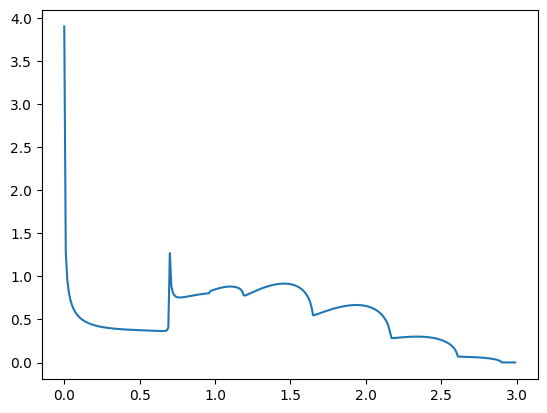

In [159]:
plt.plot(np.arange(0,3,0.01),dos_zgnr)

In [ ]:
def infi():
    iden = np.eye(n)
    right = leads()
    left = leads()
    hopp = 

    
    c_l_1 =iden -right@ hopp @ left_device @ hopp
    c_l = np.linalg.solve(c_l_1, left_device)
    c_l_2 = iden - left_device @ hopp @ right @ hopp
    c_r = np.linalg.solve(c_l_2, right)


np.complex128(-160.51805228545993j)

In [ ]:
def device(w,d,t,e,l):
#    lead = leads[w]
    hopp = np.eye(l,dtype=complex)
    unit = np.linalg.inv(unitcell_leads(w,d,t,e,l))
#    G = unit.copy()
    g = unit.copy()
    iden = np.eye(l,dtype=complex)

    G= leads[w]

    g_hopp = g @ hopp
    for _ in range(100):
        A = iden -g @hopp  @ G @ hopp
        G_new = np.linalg.solve(A, g)
        G = G_new
    
    left_device = G_new
    right = leads[w]
    ##connect left to right lead##
    c_l_1 =iden -right@ hopp @ left_device @ hopp
    c_l = np.linalg.solve(c_l_1, left_device)
    c_l_2 = iden - left_device @ hopp @ right @ hopp
    c_r = np.linalg.solve(c_l_2, right)

    ##transmission and greens functions##

    G_ll = c_l  - np.transpose(np.conjugate(c_l ))
    G_rr = c_r - np.transpose(np.conjugate(c_r))

    G_lr = left_device @ hopp @ c_r
    Gnon = G_lr - np.transpose(np.conjugate(G_lr))



    tr1 = G_ll @ hopp @ G_rr @hopp - hopp@Gnon @hopp @Gnon
#    inl,hop,inr,hop - np.linalg.multi_dot([hop,gnon,hop,gnon])
    tr2 = np.trace(tr1).sum()

    return np.abs(tr2)